In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
#kinematic viscosity curve fit:
dataframe = pd.read_csv("./data/models_data/Viscosity_data.csv",sep=";")
dataframe = dataframe[["emp. [°C]","Kin. Viscosity [mm²/s]","Density [g/cm³]"]].dropna()
poly = np.polyfit(dataframe["emp. [°C]"],dataframe["Kin. Viscosity [mm²/s]"], deg=5)
print(np.polyval(poly, 13.1795)) #returns the v (kinematic viscosity of water) of 5C°

1.1953406700143947


In [3]:
LakeAegeri= pd.read_csv("./data/cleaned_data/Aegeri/230404_skin_bulk_aegeri_cleaned.csv").drop(["Unnamed: 0"], axis=1)
LakeAegeri["datetime"] = pd.to_datetime(LakeAegeri["datetime"])
LakeAegeri.columns

Index(['datetime', 'bulk_temp', 'skin_temp', 'air_temp', 'wind_speed',
       'air_pressure', 'relative_humidity', 'solar_irradiance',
       'meteo_timestamp'],
      dtype='object')

In [4]:
LakeAegeri["Conductivity"]=172#we dont have the data here. later...
LakeAegeri.head()

def skin_effect(dataframe,column_watertemp,column_windspeed,column_solar_irradiance,column_conductivity,variance=6):
    #see above
    dataframe_viscos = pd.read_csv("./data/models_data/Viscosity_data.csv",sep=";")
    dataframe_viscos = dataframe_viscos[["emp. [°C]","Kin. Viscosity [mm²/s]","Density [g/cm³]"]].dropna()
    poly = np.polyfit(dataframe_viscos["emp. [°C]"],dataframe_viscos["Kin. Viscosity [mm²/s]"], deg=5)

    dataframe["kin_Viscosity"]= np.polyval(poly,dataframe[column_watertemp])
    #thikness_of_molecular_sublayer=(variance*dataframe["kin_Viscosity"])/dataframe[column_windspeed]


    delta_t=(variance*dataframe[column_solar_irradiance]*dataframe["kin_Viscosity"])/(dataframe[column_conductivity]*dataframe[column_windspeed])
    return pd.concat([pd.DataFrame(delta_t),dataframe],axis=1).rename(columns={0: "Skin_effect"})

result = skin_effect(dataframe=LakeAegeri,column_watertemp="bulk_temp",variance=4,column_windspeed="wind_speed",column_solar_irradiance="solar_irradiance",column_conductivity="Conductivity")

In [12]:
#Test the model:
result["Skin_effect_real"]=(result["bulk_temp"]-result["skin_temp"]).abs()



display(result["Skin_effect"].describe())
display(result["Skin_effect_real"].describe())

C:\Users\claud\AppData\Local\Temp\ipykernel_5812\1830905400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Skin_effect_real"]=(result["bulk_temp"]-result["skin_temp"]).abs()


count    17078.000000
mean         1.032615
std          2.395281
min          0.000000
25%          0.000000
50%          0.005737
75%          0.730598
max         14.981336
Name: Skin_effect, dtype: float64

count    17078.000000
mean         1.938875
std          1.573648
min          0.000200
25%          0.738925
50%          1.556850
75%          2.714575
max         10.322860
Name: Skin_effect_real, dtype: float64

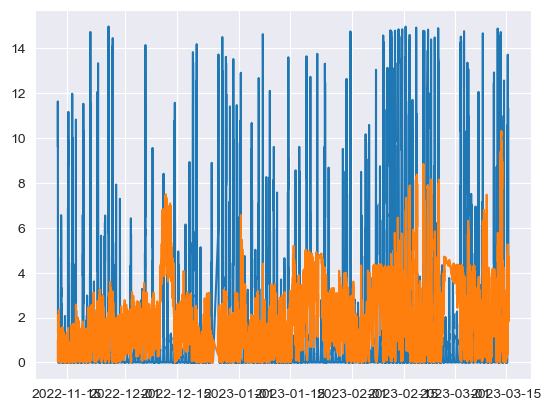

In [8]:
count = result[result["Skin_effect"] > 15].count()

result = result.loc[result["Skin_effect"] < 15 ]

plt.plot(result["datetime"],result["Skin_effect"])
plt.plot(result["datetime"],result["Skin_effect_real"])

In [11]:
result["Skin_effect_real_diff"]=(result["Skin_effect"]-result["Skin_effect_real"]).abs()
result["Skin_effect_real_diff"].describe()

C:\Users\claud\AppData\Local\Temp\ipykernel_5812\1652100800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Skin_effect_real_diff"]=(result["Skin_effect"]-result["Skin_effect_real"]).abs()


count    17078.000000
mean         2.083948
std          1.905258
min          0.000020
25%          0.739288
50%          1.577991
75%          2.896914
max         14.578305
Name: Skin_effect_real_diff, dtype: float64